In [312]:
%matplotlib inline
import pyfits
import numpy as np
import matplotlib.pyplot as plt

path = '/Users/thbrown/AA_project/TOBY_STACKING/SAMPLES/FULL/masters/'

# read in sample table

hdulist = pyfits.open(path+'sample_grp.fits')
tbdata = hdulist[1].data
ID = tbdata['ID']
z = tbdata['Z']
ms = tbdata['lgMst_median']
halo = tbdata['logMh_Mst']
nuvr = tbdata['NUV_r']
mu = tbdata['mu_star']
u_mag = tbdata['modelMag_u']
r_mag = tbdata['modelMag_r']

In [313]:
# logic table
# From Yang DR7 group catalogue readme.
#    For very small groups, no masses are assigned (with log M_halo = 0 and f_{edge}=0.0).
#    However one can obtain an estimation of the halo mass using the mean
#    relation between the stellar mass of the central galaxy and the halo mass
#    obtained in Yang et al. (2009b).

# functional M*-Mh relation Yang+2009
M0 = 10**10.3061
M1 = 10**11.0404
Mh = 10**(np.linspace(10,15, 1e6))
a = 0.3146
b = 4.5427

# truth values of stellar mass
ms_logical = M0 * (Mh/M1)**(a+b) / (1 + Mh/M1)**b

No. galaxies with log Mh = 0:  10615


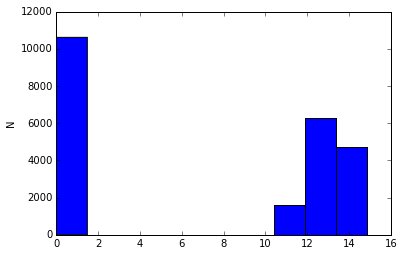

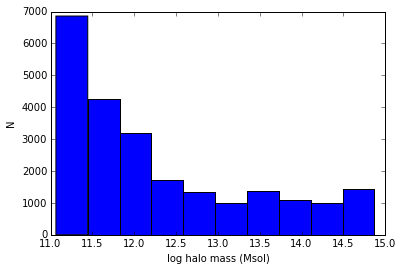

In [314]:
print 'No. galaxies with log Mh = 0: ', len(ms_smgrp)

# plot before...
plt.hist(halo)
plt.ylabel('N')
plt.show()

# interpolate halo values
idx = np.where(halo  == 0.)
ms_lin = 10**ms
mhalo_interp = np.interp(ms_lin[idx], ms_logical, Mh)
# assign back to halo array
halo[idx] =  np.log10(mhalo_interp)

# ...and after.
plt.hist(halo)
plt.xlabel('log halo mass (Msol)')
plt.ylabel('N')
plt.show()


(7, 12)

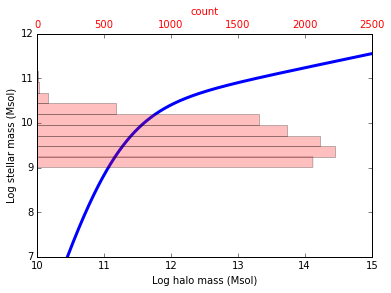

In [315]:
# plot log M* - log Mh relation from Yang+09
fig, ax1 = plt.subplots()
ax1.set_xlabel('Log halo mass (Msol)')
ax1.set_ylabel('Log stellar mass (Msol)')
ax1.plot(np.log10(Mh), np.log10(ms_logical), linewidth =3)

# histogram of 'real' stellar masses
ax2 = ax1.twiny()
ax2.hist(ms[idx], color='r', orientation='horizontal', alpha=0.25)
ax2.set_xlabel('count', color='r')
for tl in ax2.get_xticklabels():
    tl.set_color('r')
plt.ylim(7,12)
    

(7, 12)

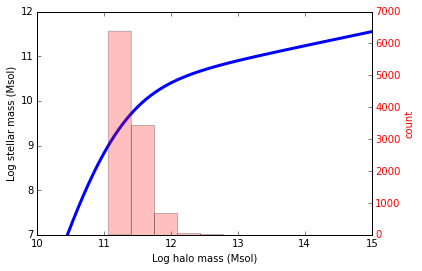

In [316]:
# plot log M* - log Mh relation

fig, ax1 = plt.subplots()
ax1.set_xlabel('Log halo mass (Msol)')
ax1.set_ylabel('Log stellar mass (Msol)')
ax1.plot(np.log10(Mh), np.log10(ms_logical), linewidth =3, color='b')

ax2 = ax1.twinx()
ax2.hist(halo[idx], color='r', alpha=0.25)
ax2.set_ylabel('count', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax1.set_ylim(7,12)

(10, 15)

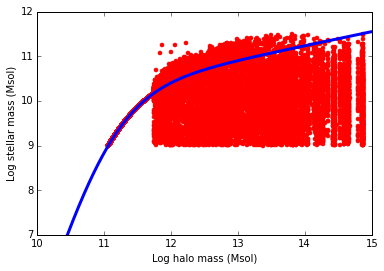

In [317]:
# plot log M* - log Mh relation

fig, ax1 = plt.subplots()
ax1.set_xlabel('Log halo mass (Msol)')
ax1.set_ylabel('Log stellar mass (Msol)')
ax1.plot(np.log10(Mh), np.log10(ms_logical), linewidth =3, color='b')
ax1.scatter(halo, ms, marker = '.', s=50, color='r', alpha=1)
ax1.set_ylim(7,12)
ax1.set_xlim(10,15)